# Load the dataset

In [1]:
import pandas as pd
df = pd.read_csv('covid_19.csv')

In [2]:
df.head()

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,NaN,Afghanistan,1939,60,252
1,4/29/2020,NaN,Albania,766,30,455
2,4/29/2020,NaN,Algeria,3848,444,1702
3,4/29/2020,NaN,Andorra,743,42,423
4,4/29/2020,NaN,Angola,27,2,7


### Count and null values

In [4]:
df.count()

Date         321
State        140
Region       321
Confirmed    321
Deaths       321
Recovered    321
dtype: int64

In [6]:
df.isnull().sum()

Date           0
State        181
Region         0
Confirmed      0
Deaths         0
Recovered      0
dtype: int64

### Replace null value by another one

In [8]:
df.State.fillna("no info", inplace = True)
df.isnull().sum()

Date         0
State        0
Region       0
Confirmed    0
Deaths       0
Recovered    0
dtype: int64

### Visualization of null values

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

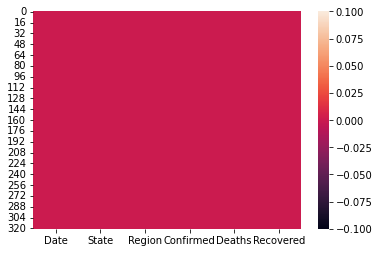

In [10]:
sns.heatmap(df.isnull())

### The numbers of Confirmed, Deaths and Recovered cases in each Region

In [12]:
df.groupby("Region").sum().head(5)

,Confirmed,Deaths,Recovered
Region,,,
Afghanistan,1939,60,252
Albania,766,30,455
Algeria,3848,444,1702
Andorra,743,42,423
Angola,27,2,7


#### Only Confirmed

In [14]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending =False).head(20)

Region
US                1039909
Spain              236899
Italy              203591
France             166543
UK                 166441
Germany            161539
Turkey             117589
Russia              99399
Iran                93657
Mainland China      82862
Brazil              79685
Canada              52865
Belgium             47859
Netherlands         38998
Peru                33931
India               33062
Switzerland         29407
Ecuador             24675
Portugal            24505
Saudi Arabia        21402
Name: Confirmed, dtype: int64

#### Confirmed and recovered

In [16]:
df.groupby('Region')['Confirmed', 'Recovered'].sum().head(5)

C:\Users\JULIA\anaconda3\envs\Tensor\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered
Region,,
Afghanistan,1939,252
Albania,766,455
Algeria,3848,1702
Andorra,743,423
Angola,27,7


### Show all the records where Confirmed cases is Less than 20

In [17]:
df[~(df['Confirmed'] < 20)]

,Date,State,Region,Confirmed,Deaths,Recovered
0,4/29/2020,no info,Afghanistan,1939,60,252
1,4/29/2020,no info,Albania,766,30,455
2,4/29/2020,no info,Algeria,3848,444,1702
3,4/29/2020,no info,Andorra,743,42,423
4,4/29/2020,no info,Angola,27,2,7
...,...,...,...,...,...,...
315,4/29/2020,Wisconsin,US,6520,308,0
316,4/29/2020,Wyoming,US,545,7,0
317,4/29/2020,Xinjiang,Mainland China,76,3,73
319,4/29/2020,Yunnan,Mainland China,185,2,181


### Remove all the records where Confirmed cases is Less than 20

In [18]:
df = df[~(df['Confirmed'] < 20)]

### In Which Region, Maximum of number of Confirmed cases were recorded

In [19]:
df.groupby('Region').Confirmed.sum().sort_values(ascending =False).head(5)

Region
US        1039895
Spain      236899
Italy      203591
France     166518
UK         166396
Name: Confirmed, dtype: int64

### In Which Region, Maximum of number of Confirmed cases were recorded

In [23]:
df.groupby('Region')['Confirmed'].sum().sort_values(ascending=True).head(5)

Region
Grenada                20
Botswana               23
Antigua and Barbuda    24
Timor-Leste            24
Angola                 27
Name: Confirmed, dtype: int64

### How many Confirmed, Deaths & Recovered cases were reported France ?

In [26]:
df[df.Region == 'France'].head(10)

,Date,State,Region,Confirmed,Deaths,Recovered
57,4/29/2020,no info,France,165093,24087,48228
209,4/29/2020,French Guiana,France,125,1,93
210,4/29/2020,French Polynesia,France,58,0,50
218,4/29/2020,Guadeloupe,France,149,12,82
247,4/29/2020,Martinique,France,175,14,83
250,4/29/2020,Mayotte,France,460,4,235
286,4/29/2020,Reunion,France,420,0,300
300,4/29/2020,St Martin,France,38,3,24


### Sort the entire data wrt No.of Confirmed cases in ascending order

In [29]:
df.sort_values(by = ['Confirmed'], ascending = True)

,Date,State,Region,Confirmed,Deaths,Recovered
64,4/29/2020,no info,Grenada,20,0,13
21,4/29/2020,no info,Botswana,23,1,5
5,4/29/2020,no info,Antigua and Barbuda,24,3,11
163,4/29/2020,no info,Timor-Leste,24,0,6
279,4/29/2020,Prince Edward Island,Canada,27,0,0
...,...,...,...,...,...,...
57,4/29/2020,no info,France,165093,24087,48228
168,4/29/2020,no info,UK,165221,26097,0
80,4/29/2020,no info,Italy,203591,27682,71252
153,4/29/2020,no info,Spain,236899,24275,132929


### Sort the entire data wrt No.of Confirmed cases in descending order

In [28]:
df.sort_values(by = ['Confirmed'], ascending = False)

,Date,State,Region,Confirmed,Deaths,Recovered
265,4/29/2020,New York,US,299691,23477,0
153,4/29/2020,no info,Spain,236899,24275,132929
80,4/29/2020,no info,Italy,203591,27682,71252
168,4/29/2020,no info,UK,165221,26097,0
57,4/29/2020,no info,France,165093,24087,48228
...,...,...,...,...,...,...
279,4/29/2020,Prince Edward Island,Canada,27,0,0
5,4/29/2020,no info,Antigua and Barbuda,24,3,11
163,4/29/2020,no info,Timor-Leste,24,0,6
21,4/29/2020,no info,Botswana,23,1,5
